In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading the graph
g = nx.read_gexf("test.gexf")

In [3]:
#Number of nodes and links
print("Number of authors(nodes):",len(g.nodes()))
print("Number of co-authorships(links):",len(g.edges()))

Number of authors(nodes): 44424
Number of co-authorships(links): 229617


## Network Visualisation

In [1]:
#nx.draw(g)
#plt.show()

## Summary statistics: Diameter, Clustering, etc

In [5]:
#Average Degree
degrees = [g.degree(n) for n in g.nodes()]

print("Average degree:", sum(degrees)/len(g.nodes))

Average degree: 10.337520259319287


In [11]:
#Connected Components
print("Is the graph connected:",nx.is_connected(g))

print("Number of connected components:",nx.number_connected_components(g))

largest_cc = max(nx.connected_components(g), key=len)
print("Largest component has:", (len(largest_cc)/g.number_of_nodes())*100,"% of nodes")

Is the graph connected: False
Number of connected components: 3942
Largest component has: 63.888888888888886 % of nodes


In [18]:
#Average Shortest Path Length (Compute Heavy)
largest_cc_graph = g.subgraph(largest_cc)
    
print("Average shortest path length of largest connected component:",nx.average_shortest_path_length(largest_cc_graph))

In [19]:
#Diameter (Compute Heavy)
print("Diameter of largest connected component:", nx.diameter(largest_cc_graph))

In [11]:
#Clustering Coefficient
print("Average Clustering Coefficient:" ,nx.average_clustering(g))

0.7684247128897982

In [26]:
#Density 
print("% of potential edges actualized in the network:",round((nx.density(g)*100),3),"%")

% of potential edges actualized in the network: 0.023 %


In [28]:
#Assortativity Coefficient
print("Assortativity Coefficient:",nx.degree_pearson_correlation_coefficient(g))

Assortativity Coefficient: 0.9867447155753161


## Degree Distribution

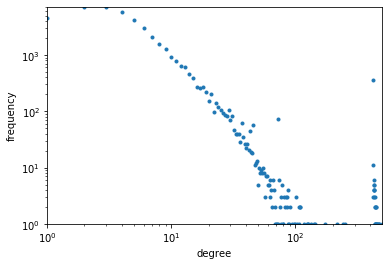

In [18]:
#Variant 1
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt

degrees = [g.degree(n) for n in g.nodes()]
degree_counts = Counter(degrees)                                                                                                 
x, y = zip(*degree_counts.items())                                                      

plt.figure(1)   

# prep axes                                                                                                                      
plt.xlabel('degree')                                                                                                             
plt.xscale('log')                                                                                                                
plt.xlim(1, max(y))  

plt.ylabel('frequency')                                                                                                          
plt.yscale('log')                                                                                                                
plt.ylim(1, max(x))                                                                                                             
                                                                                                                                     # do plot                                                                                                                        
plt.scatter(x, y, marker='.')                                                                                                    
plt.show()

Text(0, 0.5, 'Frequency')

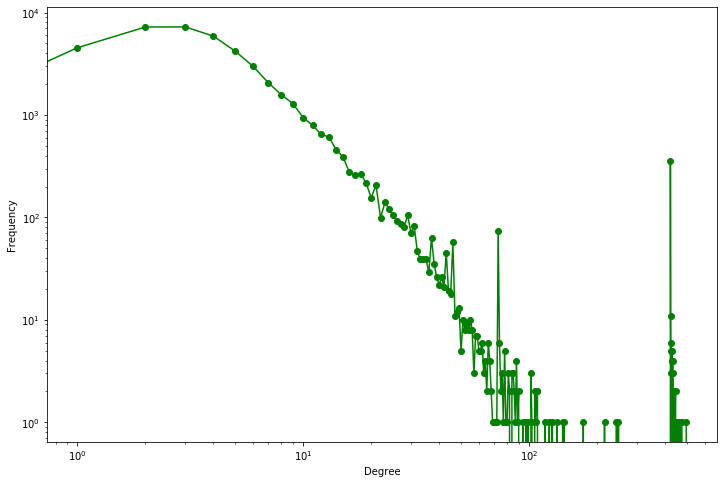

In [22]:
#Variant 2
import matplotlib.pyplot as plt
degree_freq = nx.degree_histogram(g)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degree_freq,'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

## Centrality Measures: Degree, Closeness, B/w-ness & Eigenvector

In [5]:
d_c = nx.degree_centrality(g) 

e_c = nx.eigenvector_centrality(g)

c_c = nx.closeness_centrality(g) #(Compute Heavy)

b_c = nx.betweenness_centrality(g) #(Compute Heavy)

In [12]:
df_centrality = pd.read_csv("Closeness_Betweenness.csv", index_col = 0)

In [13]:
#Create a dataframe with all centrality measures
dict_d_c = dict(d_c)
dict_e_c = dict(e_c)
dict_c_c = dict(c_c)
dict_b_c = dict(b_c)
                
df_centrality = pd.DataFrame(list(g.nodes()),columns=['Node'])

df_centrality['Closeness'] = dict_c_c.values()
df_centrality['Betweenness'] = dict_b_c.values()
df_centrality['Degree'] = dict_d_c.values()
df_centrality['Eigenvector'] =  dict_e_c.values()

In [14]:
df_centrality.head()

,Node,Closeness,Betweenness,Degree,Eigenvector
0,I. P. Gent,0.000135,2.027001e-08,0.000068,6.823069e-12
1,T. Walsh,0.000191,4.155352e-08,0.000158,2.382782e-11
2,F. Bergadano,0.000045,0.000000e+00,0.000045,8.572935e-13
3,D. Gunetti,0.000045,0.000000e+00,0.000045,8.572935e-13
4,U. Trinchero,0.000045,0.000000e+00,0.000045,8.572935e-13


In [16]:
#Sorting based on values of different centrality measures
df_c_c = df_centrality.sort_values('Closeness',ascending = False)
df_b_c = df_centrality.sort_values('Betweenness',ascending = False)
df_d_c = df_centrality.sort_values('Degree',ascending = False)
df_e_c = df_centrality.sort_values('Eigenvector',ascending = False)

In [17]:
#Top 5 authors for Closeness Centrality
df_c_c.head(5)

,Node,Closeness,Betweenness,Degree,Eigenvector
5008,Sergey Levine,0.151601,0.025062,0.005605,0.000351
3256,Yoshua Bengio,0.150116,0.020409,0.005493,0.000121
3885,Pieter Abbeel,0.147784,0.013811,0.004862,0.000124
4610,Pushmeet Kohli,0.146791,0.013917,0.002836,0.000002
1679,Lihong Li,0.144182,0.007714,0.001846,0.000002


In [18]:
#Top 5 authors for Betweenness Centrality
df_b_c.head(5)

,Node,Closeness,Betweenness,Degree,Eigenvector
5008,Sergey Levine,0.151601,0.025062,0.005605,0.000351
3256,Yoshua Bengio,0.150116,0.020409,0.005493,0.000121
4610,Pushmeet Kohli,0.146791,0.013917,0.002836,0.000002
3885,Pieter Abbeel,0.147784,0.013811,0.004862,0.000124
18440,Bo Li,0.142427,0.013625,0.002184,0.000236


In [19]:
#Top 5 authors for Degree Centrality
df_d_c.head(5)

,Node,Closeness,Betweenness,Degree,Eigenvector
12105,Lei Zhang,0.140410,0.006704,0.011188,0.048585
24097,Wenqi Li,0.134649,0.001746,0.010670,0.048702
15087,Chang Liu,0.140119,0.004555,0.010558,0.048576
11038,Shiyu Chang,0.140113,0.005213,0.010490,0.048575
10835,Kurt Keutzer,0.142577,0.004520,0.010310,0.048578


In [20]:
#Top 5 authors for Eigenvector Centrality
df_e_c.head(5)

,Node,Closeness,Betweenness,Degree,Eigenvector
24097,Wenqi Li,0.134649,0.001746,0.010670,0.048702
24100,Guotai Wang,0.133164,0.000173,0.009815,0.048687
8610,Dacheng Tao,0.136381,0.002615,0.010040,0.048685
12105,Lei Zhang,0.140410,0.006704,0.011188,0.048585
15053,Bjoern Menze,0.133893,0.000654,0.010040,0.048580
